# WEEK 5 - CLASSIFICATION

In [50]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
os.chdir(r'C:\Users\kishore-lpt\Downloads\datasets\titanic')
trainfile = pd.read_csv('train.csv')
testfile = pd.read_csv('test.csv')
trainfile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
infile.shape

NameError: name 'infile' is not defined

# Merging TEST and Train files (Only kaggle kind of compettions)

In [7]:
mergfile = trainfile.append(testfile,sort=False)
mergfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
mergfile.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
mergfile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# using find function

name1 = "Alen, Mrs. anotony"
print(name1.find('Mr')>0 or name1.find('Mrs')>0)

True


In [11]:
# using Split function

v1 = name1.split(',')
print(v1[1])

 Mrs. anotony


In [12]:
v2=v1[1].split('.')
print(v2[0].strip())

Mrs


In [13]:
tmpfile = mergfile['Name'].str.split(',',expand=True)
t2 = tmpfile[1].str.split('.',expand=True)
t3 = t2[0].str.strip()
mergfile['Title']=t3
mergfile['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
Mme               1
Sir               1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [14]:
mergfile.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [15]:
# Pivot Table
# Getting Average value for all to fill those null value
mergfile.pivot_table(index='Title',values='Age',aggfunc='mean')


,Age
Title,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [16]:
mergfile.loc[mergfile['Age'].isnull(),'Title'].value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Title, dtype: int64

In [17]:
# Fill MEAN 
mergfile.loc[(mergfile['Age'].isnull()) & (mergfile['Title']=='Master'),'Age'] = 5
mergfile.loc[(mergfile['Age'].isnull()) & (mergfile['Title']=='Mr'),'Age'] = 32
mergfile.loc[(mergfile['Age'].isnull()) & (mergfile['Title']=='Miss'),'Age'] = 22
mergfile.loc[(mergfile['Age'].isnull()) & (mergfile['Title']=='Mrs'),'Age'] = 35
mergfile.loc[(mergfile['Age'].isnull()) & (mergfile['Title']=='Dr'),'Age'] = 45
mergfile.loc[(mergfile['Age'].isnull()) & (mergfile['Title']=='Ms'),'Age'] = 28

In [18]:
mergfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [19]:
# FARE FIELD (Filled MEDIAN)
mergfile.loc[mergfile['Fare'].isnull(),:]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [20]:
mergfile.pivot_table(index = 'Pclass', values ='Fare',aggfunc='describe' )

,25%,50%,75%,count,max,mean,min,std
Pclass,,,,,,,,
1,30.6958,60.0000,107.6625,323.0,512.3292,87.508992,0.0,80.447178
2,13.0000,15.0458,26.0000,277.0,73.5000,21.179196,0.0,13.607122
3,7.7500,8.0500,15.2458,708.0,69.5500,13.302889,0.0,11.494358


In [21]:
mergfile.loc[mergfile['Fare'].isnull(),'Fare']=8

In [22]:
# Fill Embarked (FIlled Mode)

mergfile['Embarked'].value_counts()
mergfile.loc[mergfile['Embarked'].isnull(),'Embarked']='S'
mergfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [23]:
# Spliting File
trainfile = mergfile.loc[mergfile['Survived'].notnull(),:]
testfile = mergfile.loc[mergfile['Survived'].isnull(),:]

In [24]:
trainfile.to_csv('modified_train.csv', index = None)

testfile.to_csv('modified_test.csv', index = None)


In [92]:
# 0.0 means died
# 1.1 mean surived

x= trainfile.loc[:,['Fare','Age','Pclass','Parch','SibSp']]
y = trainfile['Survived']
dtmod = DecisionTreeClassifier(max_depth= 4 ,min_impurity_decrease= 0) # maximum depth : Depth to create another sub tree to find accuracy , 
# min_impurity_decrease= .1 - Keep reducing 
dtmod.fit(x,y)
predVal = dtmod.predict(x)
pd.crosstab(y,predVal)

col_0,0.0,1.0
Survived,,
0.0,511,38
1.0,205,137


In [93]:
# Accuracy 

(511+137)/891


0.7272727272727273

In [90]:
# production prediction
x1= testfile.loc[:,['Fare','Age','Pclass','Parch','SibSp']]
prodpred = dtmod.predict(x1)
outpred = pd.DataFrame()
outpred['PassengerId']= testfile['PassengerId']
outpred['Survived'] = prodpred
outpred['Survived'] = outpred['Survived'].astype(int)
outpred.to_csv('my predictions mar 14 2020.csv', index = None)

# week 5 - day 2 (Explaining decisiontree Classifier)

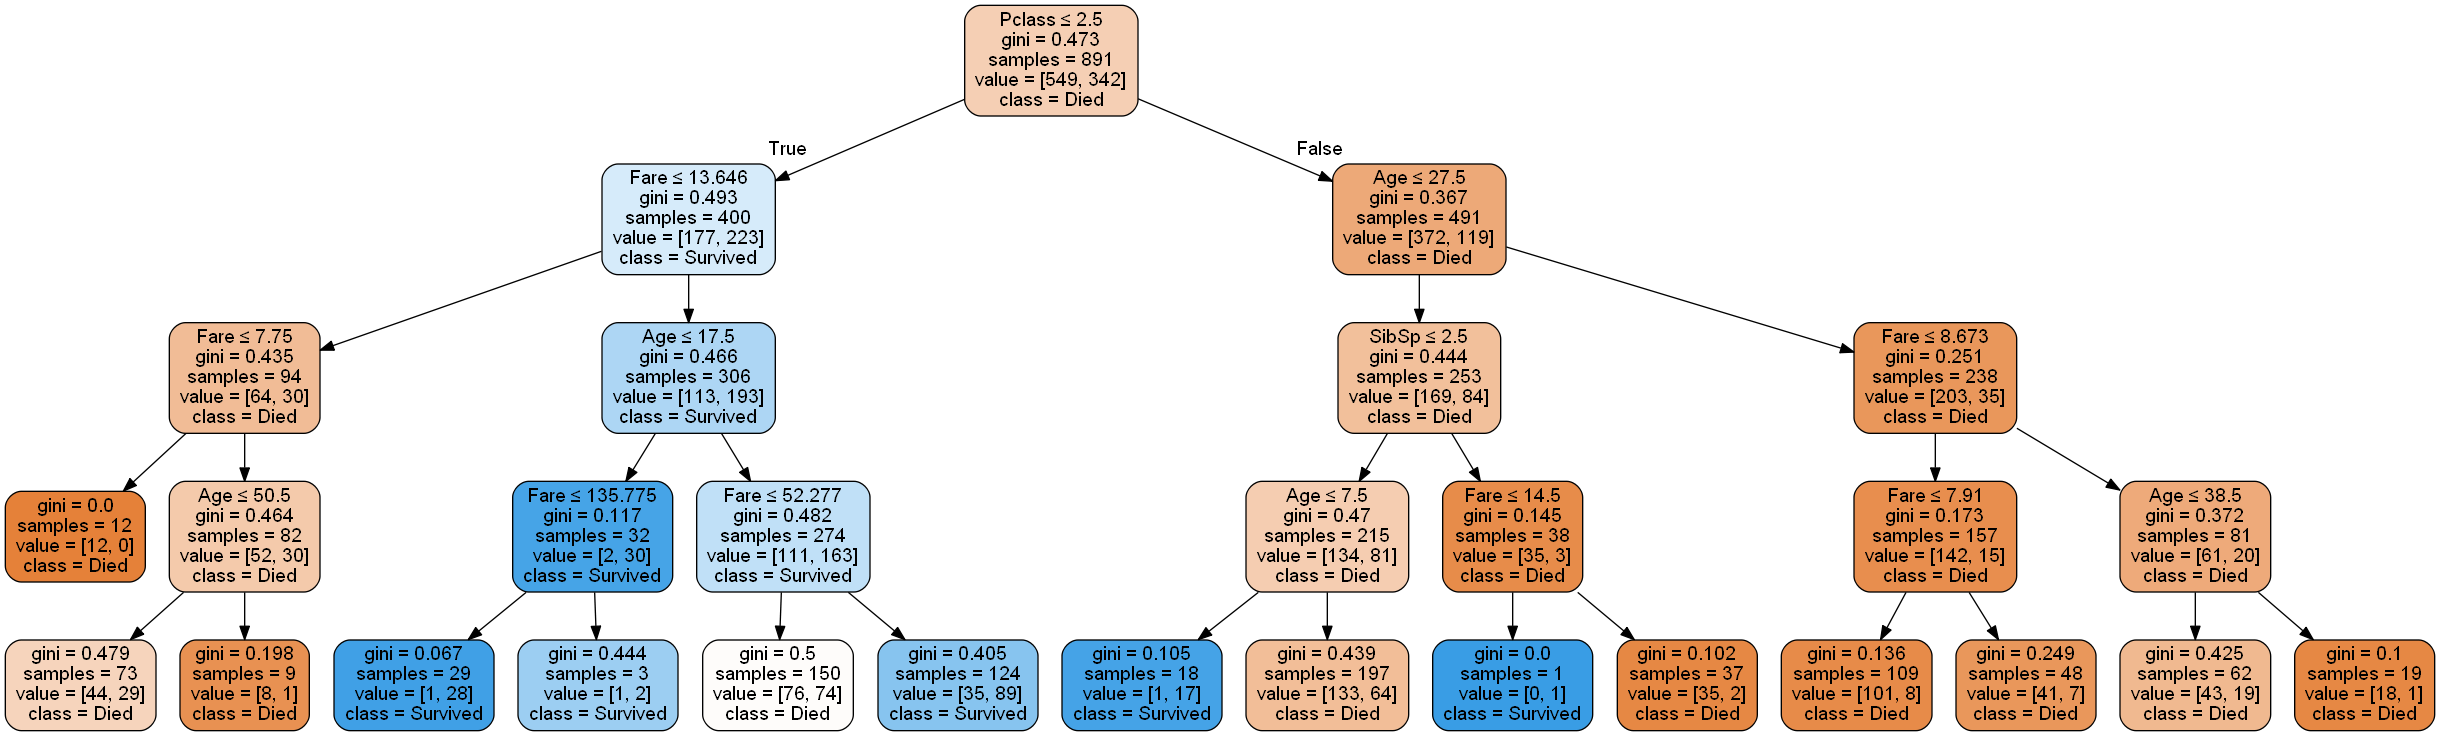

In [94]:

from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
data_feature_names = x.columns  # feature also called Input variables
export_graphviz(dtmod,
                out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True,
                feature_names=data_feature_names,
               class_names=['Died','Survived']) # ['Set','Ver','Vir']
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("abc.png")
Image('abc.png')

In [66]:
# if the decision tree is "OVER LEARNING" then the train model give high accuracy but test accuracy will be low
# DecisionTreeClassifier(max_depth=4) = maximum depth : Depth to create another sub tree to find accuracy , 
# min_impurity_decrease= .1 - Keep reducing 
# Gini is impurity score of Target variable


# To avoid over learning we need to split data : train_test_split

#intrepreting train_test_split(....)
#====================================
#test_size = .2 = 20%
# random_state = 1234 = 1234 is mataining some pattern
#  stratify = y ( this will split target value based on its category)

from  sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = .2, stratify = y, random_state = 1234) 
print(train_x.shape , test_x.shape , train_y.shape , test_y.shape)

(712, 5) (179, 5) (712,) (179,)


In [67]:
# #Unit Testing accuracy - UAT Testing Accuracy   = Should be less than 0.5 (Like r2 and Adjusted r2) which means you trained model is good.
# if the model is not good raise level of "Maximum_depth"
# check the diffrence between accuracy level


dtmod =  DecisionTreeClassifier(max_depth = 5)
dtmod.fit(train_x,train_y) #coding

#Unit Testing
predTrain = dtmod.predict(train_x)
pd.crosstab(train_y,predTrain)


col_0,0.0,1.0
Survived,,
0.0,345,94
1.0,73,200


In [68]:
#Unit Testing accuracy
(345+200)/712

0.7654494382022472

In [69]:
### UAT
predTest = dtmod.predict(test_x)
pd.crosstab(test_y,predTest)


col_0,0.0,1.0
Survived,,
0.0,77,33
1.0,29,40


In [70]:
### UAT Testing
(77+40)/179

0.6536312849162011

In [75]:
tab1 = pd.crosstab(test_y,predTest)
import numpy as np
print(tab1)
sum(np.diag(tab1))/len(test_y)

col_0     0.0  1.0
Survived          
0.0        77   33
1.0        29   40


0.6536312849162011